In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline

In [9]:
# Load data
boston = pd.read_csv('../../DataSets/Boston.csv')


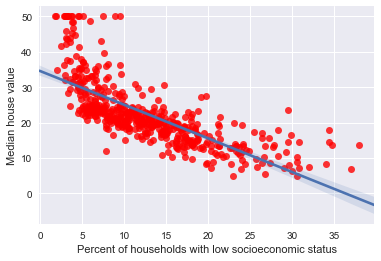

In [10]:
# Plot data and linear fit
ax = sns.regplot(boston.lstat, boston.medv, ci=95, scatter_kws={'color':'r'})
ax.set(xlabel='Percent of households with low socioeconomic status', ylabel='Median house value')


In [11]:
# Get fit statistics
fit_result = smf.ols('medv ~ lstat', boston).fit()
print(fit_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           5.08e-88
Time:                        11:55:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

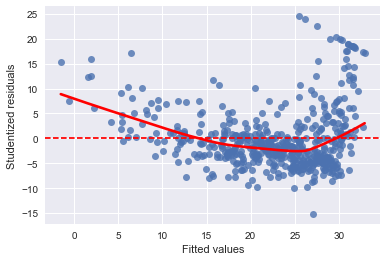

In [12]:
# Plot residuals
resid = pd.Series(fit_result.resid, name='Studentized residuals')
fit_vals = pd.Series(fit_result.fittedvalues, name='Fitted values')

ax = sns.regplot(fit_vals, resid, ci=None, line_kws={"color":'r'}, lowess=True)
ax.axhline(linestyle = '--', color = 'r')

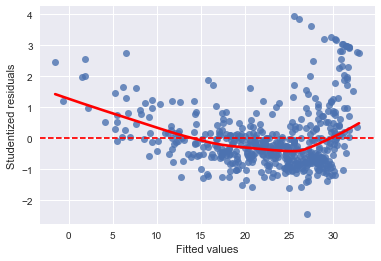

In [13]:
# Plot studentized residuals
stud_resid = pd.Series(fit_result.resid_pearson, name='Studentized residuals')
fit_vals = pd.Series(fit_result.fittedvalues, name='Fitted values')

ax = sns.regplot(fit_vals, stud_resid, ci=None, line_kws={"color":'r'}, lowess=True)
ax.axhline(linestyle = '--', color = 'r')



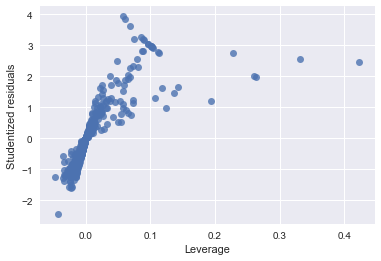

In [14]:
# Plot leverage statistics
leverage = pd.Series(OLSInfluence(fit_result).influence, name='Leverage')

sns.regplot(leverage, stud_resid, fit_reg=False)
